### (1) Use of GradientTape API


In [20]:
import tensorflow as tf

x_list = [0.0, 0.1, 0.2, 0.3]
for x in x_list:
  input_var = tf.Variable(initial_value=x)
  with tf.GradientTape() as tape:
    result = tf.math.sin(input_var)
  gradient = tape.gradient(result, input_var)
  print("gradient of sin(x) at {} = {}".format(x, gradient))

gradient of sin(x) at 0.0 = 1.0
gradient of sin(x) at 0.1 = 0.9950041770935059
gradient of sin(x) at 0.2 = 0.9800665974617004
gradient of sin(x) at 0.3 = 0.9553365111351013


### (2) Hyperparameter tuning on the IMDB dataset


Answer:  

After trying different hyperparameters, the best hyerperparameters are using the same model structure (2 hidden layers, each with 16 neurons and relu activation function), but changing the optimizer to 'Adam', and increasing the training batchsize to 1024.

The training and validation loss and accuracy are shown in the plots, showing the inflection point (overfitting) occurs after 5 epochs of training. Thus retraining the model with all training data for 5 epochs, we obtain the training accuracy of 0.945 and training loss of 0.166. The test accuracy is 0.883, test loss 0.294.

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [13]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

Epoch 1/10
15/15 [==============================] - 2s 107ms/step - loss: 0.6220 - accuracy: 0.7098 - val_loss: 0.5101 - val_accuracy: 0.8277
Epoch 2/10
15/15 [==============================] - 1s 86ms/step - loss: 0.4151 - accuracy: 0.8723 - val_loss: 0.3758 - val_accuracy: 0.8695
Epoch 3/10
15/15 [==============================] - 1s 79ms/step - loss: 0.2930 - accuracy: 0.9085 - val_loss: 0.3129 - val_accuracy: 0.8854
Epoch 4/10
15/15 [==============================] - 1s 76ms/step - loss: 0.2245 - accuracy: 0.9301 - val_loss: 0.2886 - val_accuracy: 0.8895
Epoch 5/10
15/15 [==============================] - 1s 84ms/step - loss: 0.1806 - accuracy: 0.9462 - val_loss: 0.2800 - val_accuracy: 0.8901
Epoch 6/10
15/15 [==============================] - 1s 85ms/step - loss: 0.1493 - accuracy: 0.9571 - val_loss: 0.2822 - val_accuracy: 0.8878
Epoch 7/10
15/15 [==============================] - 1s 66ms/step - loss: 0.1253 - accuracy: 0.9659 - val_loss: 0.2901 - val_accuracy: 0.8836
Epoch 8/10
1

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

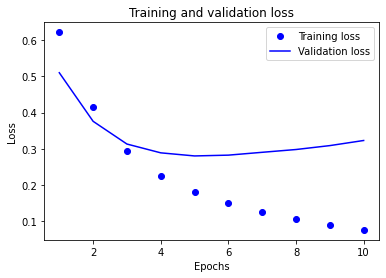

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

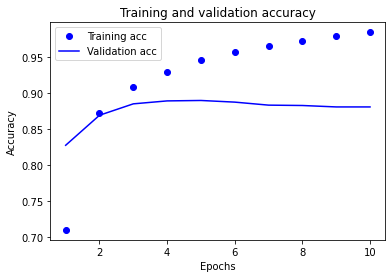

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist = model.fit(x_train, y_train, epochs=5, batch_size=1024)

print("\n"+"---"*10,"testing")
results = model.evaluate(x_test, y_test)

Epoch 1/5
25/25 [==============================] - 2s 56ms/step - loss: 0.5953 - accuracy: 0.7062
Epoch 2/5
25/25 [==============================] - 1s 54ms/step - loss: 0.3604 - accuracy: 0.8898
Epoch 3/5
25/25 [==============================] - 1s 59ms/step - loss: 0.2475 - accuracy: 0.9190
Epoch 4/5
25/25 [==============================] - 1s 57ms/step - loss: 0.1957 - accuracy: 0.9340
Epoch 5/5
25/25 [==============================] - 1s 51ms/step - loss: 0.1660 - accuracy: 0.9450

------------------------------ testing
782/782 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.8831


In [18]:
print(hist.history.keys())
for k,v in hist.history.items():
  print(k,"=",v)

print()
print("test_loss =", results[0])
print("test_acc =", results[1])


dict_keys(['loss', 'accuracy'])
loss = [0.5953339338302612, 0.360353946685791, 0.24751697480678558, 0.19568337500095367, 0.1659945845603943]
accuracy = [0.7061600089073181, 0.8897600173950195, 0.9190000295639038, 0.9340400099754333, 0.9449999928474426]

test_loss = 0.2940043807029724
test_acc = 0.8831200003623962


### Using a trained model to generate predictions on new data

In [19]:
model.predict(x_test)

array([[0.22867236],
       [0.9978789 ],
       [0.75263363],
       ...,
       [0.10445344],
       [0.08650866],
       [0.58263826]], dtype=float32)